<a href="https://colab.research.google.com/github/wjpsky/LTU/blob/main/text_mining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you need Python, please download here: https://www.python.org/downloads/ 

Quick quize to test our current level of knowledge: https://s.surveyplanet.com/ncjcbtec 

For those who have no knowledge of Python or will like to learn: https://www.python.org/about/gettingstarted/ 

References:
1. NLTK: https://www.nltk.org/book/ch01.html 
2. spaCy: https://spacy.io/usage/spacy-101 

At the end of the Lab, students should be able to 
1. Do tokenization & text preprocessing
2. Visualize a vector space in low dimension

Python data types (e.g. int, str, set, list, float ...)

In [ ]:
# Explicitly typecast 2 ints as float and display their sum 
sum = float(3) + float(34) 
print('The sum of {0} and {1} is {2}'.format(3, 34, sum)) 

The sum of 3 and 34 is 37.0


Loops

In [ ]:
n=4 # no of cases
a=[]  # list/array type

for i in range(0,n): 
    elem=int(input("Enter mark: ")) # inefficient input/output approach...more efficient to read from a file.
    a.append(elem) 

avg = a[1] + a[2]

print("Average of marks in the list", round(avg,2)) 

Enter mark: 2
Enter mark: 2
Enter mark: 2
Enter mark: 2
Average of marks in the list 4


In [ ]:
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

print("The average is", cal_average([18,25,3,41,5]))

The average is 18.4


Loop to remove duplicates from list (Pandas library has a special function for this when dealing with data)

In [ ]:
a = [10,20,30,20,10,50,60,40,80,50,40]
dup_items = set() 
uniq_items = [] 

for x in a:                         # List comprehension is a more efficient way to do something similar
    if x not in dup_items:
        uniq_items.append(x)
        dup_items.add(x) 

print(dup_items)
print(uniq_items)

{40, 10, 80, 50, 20, 60, 30}
[10, 20, 30, 50, 60, 40, 80]


Conditional statements

Functions

In [ ]:
# Get the second smallest number in a list

def second_smallest(numbers): 
    a1, a2 = float('inf'), float('inf') 
    for x in numbers: 
        if x <= a1: 
            a1, a2 = x, a1 
        elif x < a2: 
            a2 = x 
    return a2 

res = second_smallest([-1, 4, -3, 1, 5, 2, -8, -2, 0])
print(res)

-3


Import modules/libraries

In [ ]:
import datetime 

now = datetime.datetime.now() 
print ("Current date and time : ", now.strftime("%Y-%m-%d %H:%M:%S")) 
print('--------------------')

# Some maths
from math import pi 

r = 2.4
a = pi * r**2 
print ("The area of the circle" + " is: " + str(a))   # what will happen if we did not typecast a?

Current date and time :  2022-11-19 19:11:56
--------------------
The area of the circle is: 18.09557368467721


Tokenization with NLTK

In [ ]:
import nltk
nltk.download('punkt')                                              # use this to download the punkt resource once
data = "Sommaren är bäst i Sverige när bäst är först"
tokens = nltk.word_tokenize(data)
fd = nltk.FreqDist(tokens)
print(tokens)
print(fd)
print(fd.most_common(1))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Sommaren', 'är', 'bäst', 'i', 'Sverige', 'när', 'bäst', 'är', 'först']
<FreqDist with 7 samples and 9 outcomes>
[('är', 2)]


Text Preprocessing with the Pandas library

In [ ]:
import pandas as pd

def preprocess_pandas(data):
    data['Sentence'] = data['Sentence'].str.lower()                                                                     # make all lowercase
    data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)                      # remove emails
    data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)    # remove IP address
    data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')                                                       # remove special characters
    data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)                                                   # remove numbers
    return data

lst = ['Det är mycket bra att laga mat','Swenglish is fun to speak! :)']
df = pd.DataFrame (lst, columns = ['Sentence'])
data = preprocess_pandas(df)
print(data)

                         Sentence
0  det är mycket bra att laga mat
1      swenglish is fun to speak 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


Task 1

1. Implement tokenization using the spaCy library instead of the NLTK library.
2. Implement part of speech (PoS) tagging using spaCy or NLTK for the first 500 samples in the training set of the IMDB data. Link to data: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 
3. Visualize the first 20 samples in the IMDB training data using PCA, t-SNE or any other low-dimensionality algorithm.

Grading questions (in addition to any relevant ones not listed below):

1. Run your code, go through it and explain what it does.
2. Is there any part of the code that may be optimized (made better)
3. What other challenges can this solution be adapted for?
4. Will you like to discuss the time & space complexities of parts of your solution (optional)?

Task 1.1 Implement tokenization using the spaCy library instead of the NLTK library.

In [ ]:
!python -m spacy download sv_core_news_sm

2022-11-19 19:12:23.192365: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.7 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('sv_core_news_sm')


In [ ]:
from pandas.core.ops import common
import spacy
from collections import Counter
#from spacy.lang.sv.examples import sentences 

sp = spacy.load("sv_core_news_sm")
text = """Sommaren är bäst i Sverige när bäst är först"""

data = sp(text)
print(data)
word_freq = Counter(data)
common_words = word_freq.most_common()
print(common_words)
for token in data:
    print(token.text)

Sommaren är bäst i Sverige när bäst är först
[(Sommaren, 1), (är, 1), (bäst, 1), (i, 1), (Sverige, 1), (när, 1), (bäst, 1), (är, 1), (först, 1)]
Sommaren
är
bäst
i
Sverige
när
bäst
är
först


Task 1.2 Implement part of speech (PoS) tagging using spaCy or NLTK for the first 500 samples in the training set of the IMDB data. Link to data: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/kaggle/IMDB_Dataset.csv", nrows=500)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(500, 2)

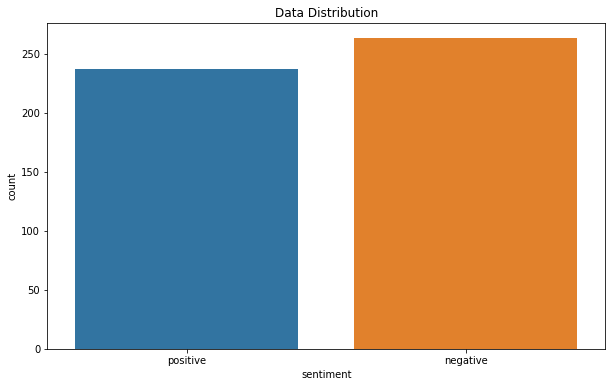

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
%matplotlib inline
plt.figure(figsize = (10,6))
plt.title("Data Distribution")
sns.countplot(x = "sentiment", data = data)

plt.show()

In [ ]:
import string
nlp = spacy.load("en_core_web_sm")
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
words_adj = []
for line in data['review']:
  doc = nlp(line)
  tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ']
  words_adj.append(tokens)

In [ ]:
data['words_adj'] = pd.Series(words_adj)
data.head()

,review,sentiment,words_adj
0,One of the other reviewers has mentioned that ...,positive,"[other, right, first, faint, hearted, timid, h..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, unassuming-, old, entire, ..."
2,I thought this was a wonderful way to spend ti...,positive,"[wonderful, hot, light, hearted, simplistic, w..."
3,Basically there's a family where a little boy ...,negative,"[little, slow, watchable, divorcing, real, sim..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[stunning, vivid, human, different, same, pres..."


In [ ]:
positive_adj = data[data['sentiment']=='positive']['words_adj']
pos_words = [line for line in positive_adj for line in set(line)]
pos_adj_count = Counter(pos_words).most_common(10)
print(pos_adj_count)
print(pos_adj_count[0][0])
print(pos_adj_count[0][1])

[('good', 111), ('great', 87), ('other', 62), ('little', 60), ('more', 59), ('many', 55), ('first', 47), ('old', 46), ('young', 42), ('real', 38)]
good
111


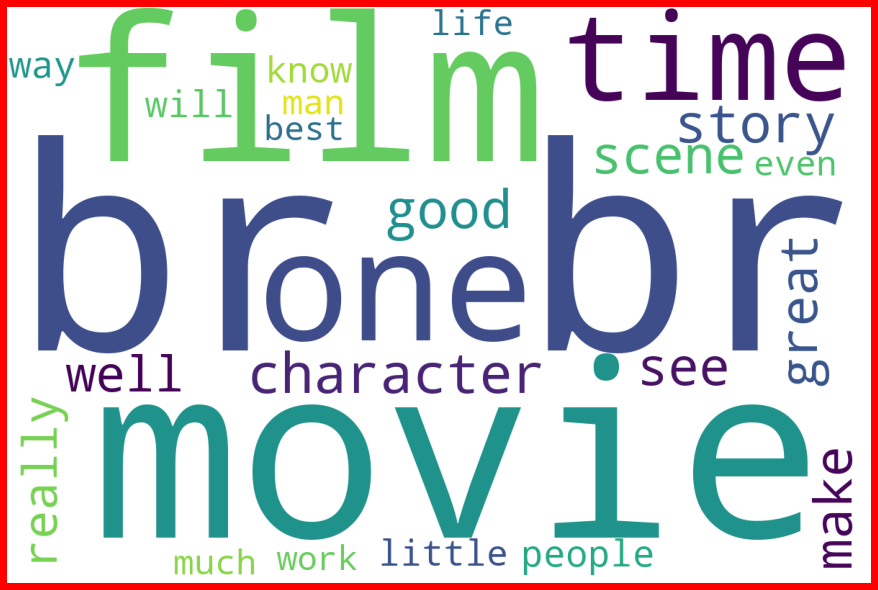

In [ ]:
from wordcloud import WordCloud
positive_map=data['review'][data['sentiment']=='positive']
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25).generate(' '.join(positive_map))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Most Postive words")
sns.countplot(x = pos_adj_count[][])

plt.show()

SyntaxError: ignored

Task1.3 Visualize the first 20 samples in the IMDB training data using PCA, t-SNE or any other low-dimensionality algorithm.

In [ ]:
data_20 = pd.read_csv("/content/drive/MyDrive/kaggle/IMDB_Dataset.csv", nrows=20)
data_20.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data_20.shape

(20, 2)

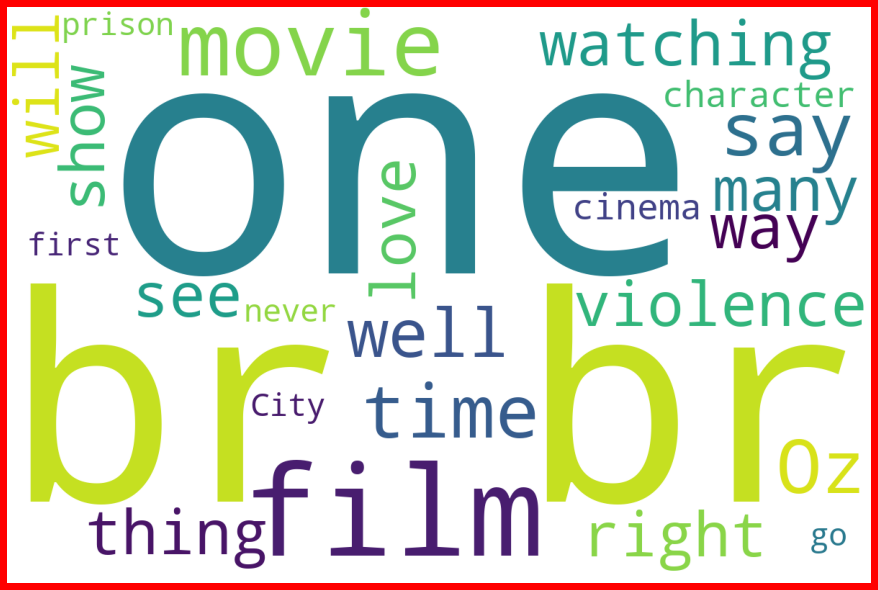

In [ ]:
from wordcloud import WordCloud
positive_map=data_20['review'][data_20['sentiment']=='positive']
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25).generate(' '.join(positive_map))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


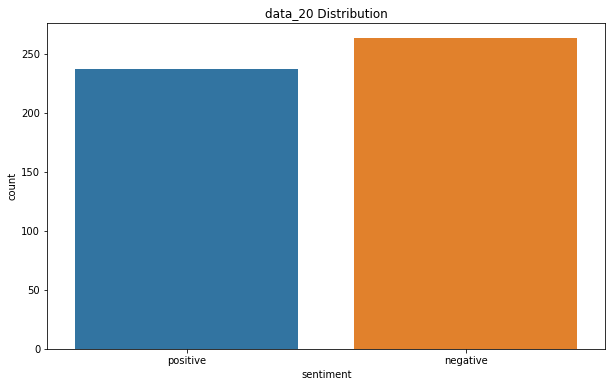

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


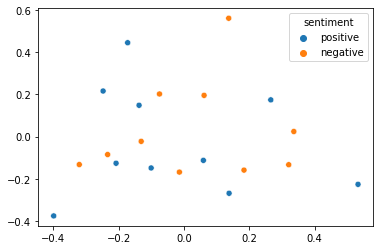

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


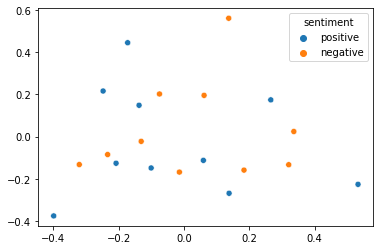

In [35]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import en_core_web_sm
nlp = en_core_web_sm.load()
from collections import Counter
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

data_20 = pd.read_csv("/content/drive/MyDrive/kaggle/IMDB_Dataset.csv", nrows=20)
data_20.head()

data_20['review'] = data_20['review'].apply(lambda x: x.lower())
data_20['review'] = data_20['review'].apply(lambda x: x.split())
data_20['review'] = data_20['review'].apply(lambda x: [word for word in x if word not in STOP_WORDS])
data_20['review'] = data_20['review'].apply(lambda x: [word for word in x if word not in punctuation])
data_20['review'] = data_20['review'].apply(lambda x: [word for word in x if word not in string.punctuation])
data_20['review'] = data_20['review'].apply(lambda x: [word for word in x if word.isalpha()])

data_20.head()

data_20['review'] = data_20['review'].apply(lambda x: ' '.join(x))
data_20.head()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_20['review'])

tfidf_matrix.shape

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(tfidf_matrix.toarray())

pca_matrix.shape

pca_matrix

plt.figure(figsize = (10,6))
plt.title("data_20 Distribution")
sns.countplot(x = "sentiment", data = data)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(pca_matrix[:,0], pca_matrix[:,1], hue = data_20['sentiment'], legend = 'full')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(pca_matrix[:,0], pca_matrix[:,1], hue = data_20['sentiment'], legend = 'full')
plt.show()